In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/WELFake_Dataset.csv')

In [ ]:
print(data.shape)

(72134, 4)


In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
print(data.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [ ]:
data=data.fillna(' ')

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing Functions
def preprocess_text(text):
    """Lowercase and remove non-essential characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Keep only alphanumeric and spaces
    return text

In [ ]:
def tokenize_and_remove_stopwords(text):
    """Tokenize and remove stopwords."""
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]
    filtered_tokens = [[word for word in token_list if word not in stop_words] for token_list in tokens]
    return filtered_tokens

In [ ]:
def regex_filter(text):
    """Remove numbers, URLs, emails, and phone numbers."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '', text)  # Remove phone numbers
    return text

In [ ]:
import re
def fin(text):
  text=  re.sub(r'[^\w\s]', ' ',text)
  text = re.sub(r'[ \n]+', ' ', text)
  return text

In [ ]:
def lemmatize_text(tokens):
    """Lemmatize tokens."""
    lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in tokens]
    return lemmatized_tokens

In [ ]:
def full_preprocess_pipeline(text):
    """Complete preprocessing pipeline for a single text."""
    text = preprocess_text(text)  # Lowercase and remove non-essential characters
    text = regex_filter(text)  # Remove numbers, URLs, emails, phone numbers
    text = fin(text)  # Remove special characters and unwanted spaces
    tokens = tokenize_and_remove_stopwords(text)  # Tokenize and remove stopwords
    lemmatized_tokens = lemmatize_text(tokens)  # Lemmatize the tokens
    cleaned_text = ' '.join([' '.join(sentence) for sentence in lemmatized_words])
    return cleaned_text

In [ ]:
# # Load DataFrame (Example: replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

# Apply preprocessing to the 'title' and 'text' columns
# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)
data['cleaned_title'] = data['title'].apply(preprocess_text)

# Optionally, drop the 'Unnamed: 0' column if it's not needed
data = data.drop(columns=['Unnamed: 0'])

# Show the processed dataframe
print(data.head())

# Save the processed dataframe to a new CSV file
data.to_csv('processed_data.csv', index=False)

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  no comment is expected from barack obama membe...   
1      did they post their votes for hillary already   
2   now most of the demonstrators gathered last n...   
3  a dozen politically active pastors came here f...   
4  t

In [ ]:
processed_data=pd.read_csv('/content/processed_data.csv')

In [ ]:
print(processed_data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  no comment is expected from barack obama membe...   
1      did they post their votes for hillary already   
2   now most of the demonstrators gathered last n...   
3  a dozen politically active pastors came here f...   
4  t

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load your dataset (assuming it has 'text' column)
# df = pd.read_csv('your_data.csv')

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(processed_data, test_size=0.2, random_state=42)

# Save the text column from train and test sets to separate text files
train_df['cleaned_text'].to_csv('train_unsupervised.txt', index=False, header=False)
test_df['cleaned_text'].to_csv('test_unsupervised.txt', index=False, header=False)


In [ ]:
test=pd.read_csv('/content/test_unsupervised.txt')
train=pd.read_csv('/content/train_unsupervised.txt')

In [ ]:
print(train.head())
print("........")
print(test.head())

  although tesla ceo elon musk shocked silicon valley by breaking ranks to become an official member of the white house manufacturing jobs initiative the value of his tesla stock is up by over 2 billion since the election of donald trump as president after a dizzying week of executive orders covering obamacare trade and immigration president trump held an approval rating of 55 percent of likely voters according to the rasmussen reports daily presidential tracking poll that is only slightly below the 59 percent level of president obama when he left office  voters welcomed president trumps decision to scrap the   partnership tpp   deal and agree that the north american free trade agreement nafta with mexico and canada needs to be reworked although supporters argue free trade makes products cheaper for u s consumers americans believe     by a whopping 73 percent to 16 percent margin      it is more important to keep manufacturing jobs in the united states than keep prices low for u s cons

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296182 sha256=7fb5285c55adb738883f52fe8ff0648e98c321d0950fd3d0361f0c9f7bd9fd65
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext

# # Step 2: Train FastText in unsupervised mode on your training data
# # You can adjust parameters like dim (embedding size), minCount (minimum word count), and epoch (number of iterations)
# unsupervised_model = fasttext.train_unsupervised(input='train_unsupervised.txt', model='cbow', dim=100, epoch=5)

# # Save the trained model
# unsupervised_model.save_model('unsupervised_fasttext_model.bin')
ft_model = fasttext.load_model('unsupervised_fasttext_model.bin')

In [ ]:
import numpy as np

# Step 3: Function to create FastText embeddings for each text
def text_to_fasttext_embeddings(text, ft_model):
    words = text.split()
    embeddings = []

    # Get the vector for each word in the text and append it to the list
    for word in words:
        vector = ft_model.get_word_vector(word)
        embeddings.append(vector)

    # Return the mean of all word vectors or a zero vector if no valid words are found
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(ft_model.get_dimension())

# Step 4: Generate embeddings for the training and testing sets
train_df['embedding'] = train_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model))
test_df['embedding'] = test_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model))

# Convert the embeddings to a NumPy array
X_train_fasttext = np.vstack(train_df['embedding'].values)
X_test_fasttext = np.vstack(test_df['embedding'].values)

# Save the embeddings for future use
np.save('train_unsupervised_fasttext_embeddings.npy', X_train_fasttext)
np.save('test_unsupervised_fasttext_embeddings.npy', X_test_fasttext)

# Now X_train_fasttext and X_test_fasttext contain the FastText embeddings for each text in your train and test sets

# import numpy as np
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Assuming X_train and X_test are your text data
# texts = train + test  # Combine all text data for fitting tokenizer

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=20000)  # Adjust vocab size if needed
# tokenizer.fit_on_texts(texts)
# word_index = tokenizer.word_index

# # Load the trained FastText model
# ft_model = fasttext.load_model("unsupervised_fasttext_model.bin")

# # Prepare the embedding matrix
# embedding_dim = 300  # FastText uses 300-dimensional vectors
# vocab_size = min(20000, len(word_index)) + 1  # Limit to the top 20,000 words

# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         embedding_vector = ft_model.get_word_vector(word)
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector

# # Tokenize and pad the sequences
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_len = 100  # Adjust the maximum sequence length based on your dataset
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# # One-hot encode the labels (for binary or multi-class classification)
# y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)  # Adjust for number of classes
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=2)



In [ ]:
print(X_train_fasttext)
print(X_test_fasttext)

[[ 0.17554973 -0.52096575 -0.1078163  ...  0.66298997  0.63904387
   0.68554854]
 [ 0.49323449 -0.23665561 -0.20039538 ...  0.96383893  1.01492238
   1.12369072]
 [ 0.48764396 -0.75924635 -0.50108862 ...  0.95653796  0.87599832
   1.00468469]
 ...
 [ 0.59844947 -0.54552424 -0.06093487 ...  0.94911599  0.90300143
   0.98139298]
 [ 0.29258704 -0.19258811 -0.3146027  ...  1.01749802  0.97033
   1.10091448]
 [-0.7436946   0.25242326 -0.30307302 ...  1.25737131  1.09988725
   0.57284421]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.18685398  0.48486984 -0.71876478 ...  1.10150957  1.14427578
   0.80322075]
 [ 0.66016179 -0.6914624  -0.55320317 ...  0.8531999   0.68031335
   1.25694096]
 ...
 [ 0.03560773 -0.21688031 -0.12615536 ...  0.89539504  1.18233085
   0.79932648]
 [ 0.69188648 -0.33090904 -0.54671174 ...  0.76415724  1.00336146
   1.20778692]
 [-0.20051064 -0.22768554 -0.21633528 ...  0.8451665   0.72988969
   0.65683216]]


In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the FastText embeddings for CNN-LSTM model (samples, timesteps, features)
X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))

# Assuming binary classification (for multi-class adjust num_classes)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_train_reshaped, y_train_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (34624, 100, 1), Validation set: (11541, 100, 1), Test set: (11542, 100, 1)


In [ ]:
print(X_val)
print(X_test)
print(y_val)
print(y_test)
print(X_train_reshaped)
print(X_test_reshaped)
print(y_train_encoded)
print(y_test_encoded)

[[[ 0.69210875]
  [-0.41255772]
  [-0.66549504]
  ...
  [ 0.7820015 ]
  [ 0.89356333]
  [ 1.11530769]]

 [[ 0.47416061]
  [-0.09963874]
  [-0.73387194]
  ...
  [ 1.00302446]
  [ 1.22160602]
  [ 1.17819858]]

 [[ 0.84921771]
  [-0.99159318]
  [-0.86159539]
  ...
  [ 0.44077453]
  [ 1.01122582]
  [ 1.12898207]]

 ...

 [[ 0.02455475]
  [ 0.16317454]
  [-1.08726537]
  ...
  [ 1.02425468]
  [ 1.92793584]
  [ 1.246346  ]]

 [[ 0.65895236]
  [-0.57666206]
  [-0.72628003]
  ...
  [ 0.89807743]
  [ 1.14758062]
  [ 1.21872783]]

 [[ 0.07549055]
  [ 0.27253267]
  [-0.16433154]
  ...
  [ 1.36499274]
  [ 0.93156898]
  [ 1.18605101]]]
[[[-0.60276049]
  [ 0.53101104]
  [-0.01236581]
  ...
  [ 0.81259811]
  [ 0.78422081]
  [ 0.64419621]]

 [[ 0.44593367]
  [-0.29877302]
  [-0.51471835]
  ...
  [ 0.91234148]
  [ 1.4317292 ]
  [ 1.05805528]]

 [[ 0.24087217]
  [-0.44621244]
  [-0.40400544]
  ...
  [ 0.94924182]
  [ 0.91439569]
  [ 0.93736988]]

 ...

 [[ 0.31539631]
  [-0.48651507]
  [-0.01846319]
  ..

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [ ]:
# Reshape FastText embeddings for CNN-LSTM model (samples, timesteps, features)
X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))

# One-hot encode labels (assuming binary classification)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [ ]:
def create_cnn_lstm_model(input_shape, num_classes, l1_lambda=0.01, l2_lambda=0.01):
    inputs = Input(shape=input_shape)

    # CNN part
    x = Conv1D(filters=64, kernel_size=4, activation='relu', kernel_regularizer=l2(l2_lambda))(inputs)
    x = MaxPooling1D(pool_size=2)(x)

    # LSTM part
    x = LSTM(50, return_sequences=True, kernel_regularizer=l2(l2_lambda))(x)
    x = Dropout(0.3)(x)
    x = LSTM(30, kernel_regularizer=l1(l1_lambda))(x)

    # Output
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Define input shape and number of classes
input_shape = (X_train_reshaped.shape[1], 1)  # (timesteps, features)
num_classes = 2  # Adjust if more classes

# Create the model
cnn_lstm_model = create_cnn_lstm_model(input_shape, num_classes, l1_lambda=0.01, l2_lambda=0.01)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = cnn_lstm_model.fit(
    X_train_reshaped,
    y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test_encoded),
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.7379 - loss: 1.4688 - val_accuracy: 0.8379 - val_loss: 0.4272 - learning_rate: 0.0010
Epoch 2/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 127s 62ms/step - accuracy: 0.8427 - loss: 0.4019 - val_accuracy: 0.8674 - val_loss: 0.3552 - learning_rate: 0.0010
Epoch 3/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 150s 66ms/step - accuracy: 0.8641 - loss: 0.3601 - val_accuracy: 0.8724 - val_loss: 0.3435 - learning_rate: 0.0010
Epoch 4/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 137s 64ms/step - accuracy: 0.8595 - loss: 0.3676 - val_accuracy: 0.8705 - val_loss: 0.3474 - learning_rate: 0.0010
Epoch 5/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 146s 66ms/step - accuracy: 0.8662 - loss: 0.3520 - val_accuracy: 0.8434 - val_loss: 0.3894 - learning_rate: 0.0010
Epoch 6/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.8689 - loss: 0.3476 - val_accuracy: 0.8759 - val_loss: 0.3322 - learning_rate: 0.0010
Epoch 7/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_lstm_model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


451/451 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8891 - loss: 0.2891
Test Loss: 0.28749188780784607, Test Accuracy: 0.8893740773200989


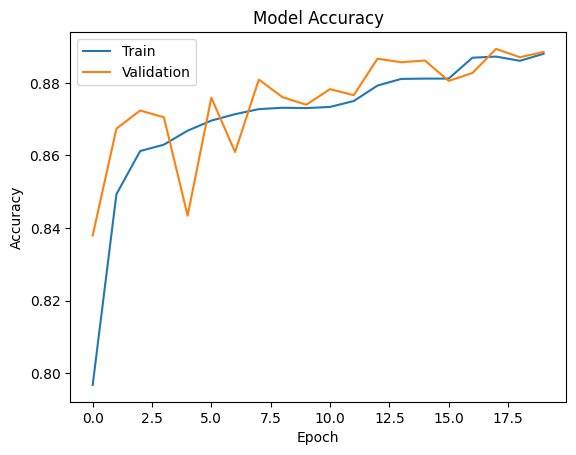

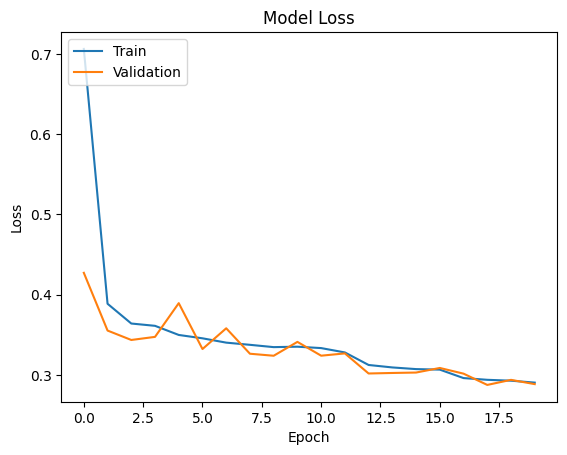

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


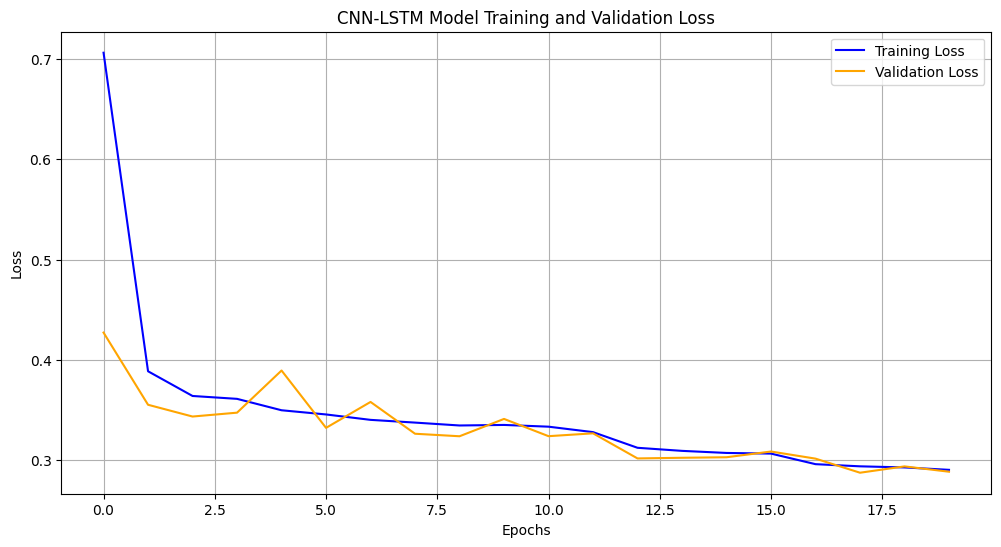

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the model.fit() function
# For example: history = model.fit(X_train_reshaped, y_train_encoded, validation_data=(X_test_reshaped, y_test_encoded), epochs=10, batch_size=32)

# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('CNN-LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


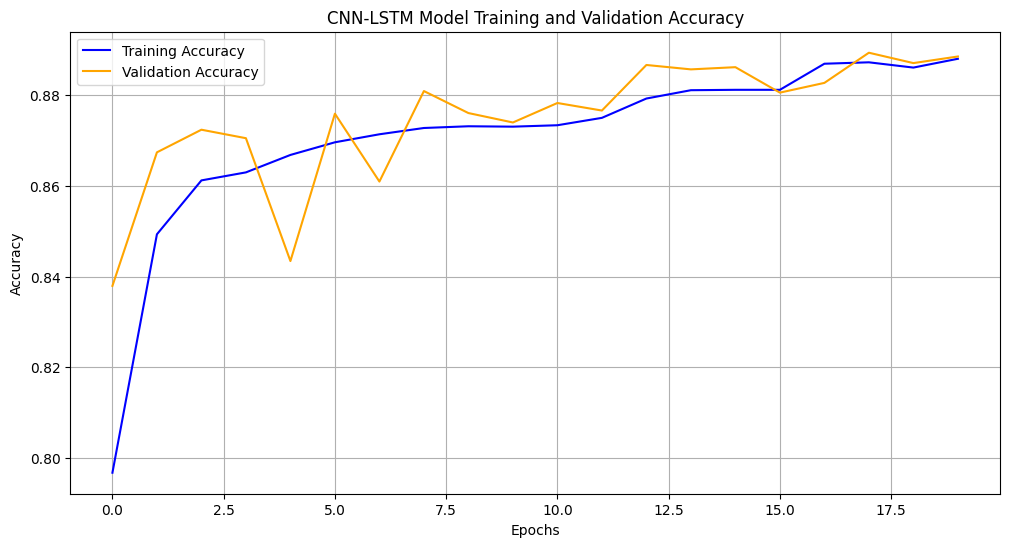

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the model.fit() function
# For example: history = model.fit(X_train_reshaped, y_train_encoded, validation_data=(X_test_reshaped, y_test_encoded), epochs=10, batch_size=32)

# Plotting the accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN-LSTM Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step


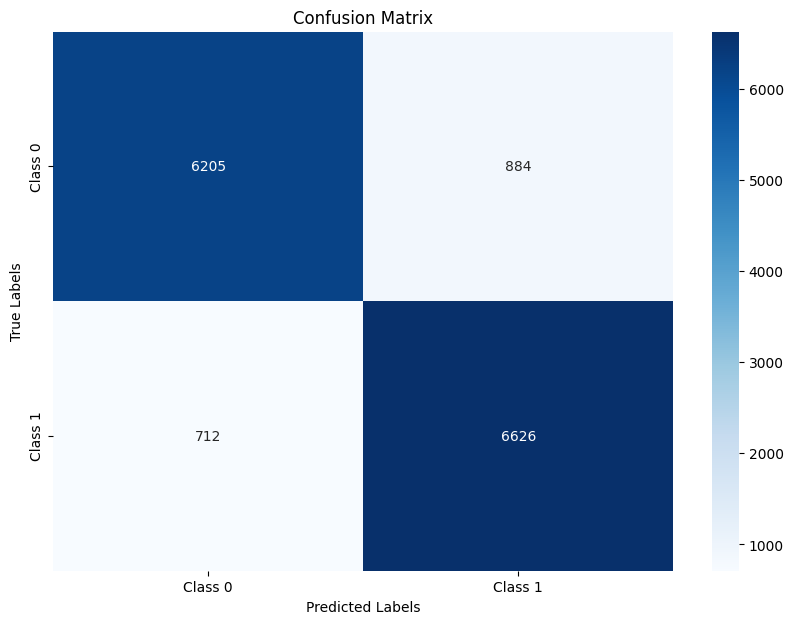

              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89      7089
     Class 1       0.88      0.90      0.89      7338

    accuracy                           0.89     14427
   macro avg       0.89      0.89      0.89     14427
weighted avg       0.89      0.89      0.89     14427



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 5: Make predictions on the test set
y_pred_probs = cnn_lstm_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class labels from probabilities
y_true = np.argmax(y_test_encoded, axis=1)  # True labels

# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 8: Print classification report
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00
